# Firefly implementation with cycle-wise plot for a)

In [1]:
import random
import math

class FireFly:
    def __init__(self, radius, time_steps, uid, N):
        self.uid = uid
        self.position = (random.uniform(0,1), random.uniform(0,1)) # random position of firefly
        self.neighbours = [] # visible neighbours
        self.r = radius # radius of perception
        self.L = time_steps # time steps
        self.cycle_timer = random.randrange(0,50) # current cycle timer
        self.population_size = N
    ### Perceive neighbours
    def calc_neighbours(self, positions):
        for i in range(self.population_size):
            if i == self.uid:
                continue
            if math.dist(positions[i], self.position) < self.r:
                self.neighbours.append(i)
    ### return own position
    def get_position(self):
        return self.position
    ### is this firefly currently flashing?
    def live(self):
        self.cycle_timer += 1
        if self.cycle_timer > self.L:
            self.cycle_timer = 0
        return self.uid, self.cycle_timer
    ### synch with neighbours
    def synch(self, flashers):
        counter = 0
        for neighbour in self.neighbours:
            if flashers[neighbour]:
                counter += 1
        if counter > len(self.neighbours)/ 2:
            self.cycle_timer += 1
    ### check if flashing
    def flashing(self):
        return self.cycle_timer < self.L/2
    def get_neighbours(self):
        return self.neighbours



After 20 the fireflies are now like this:


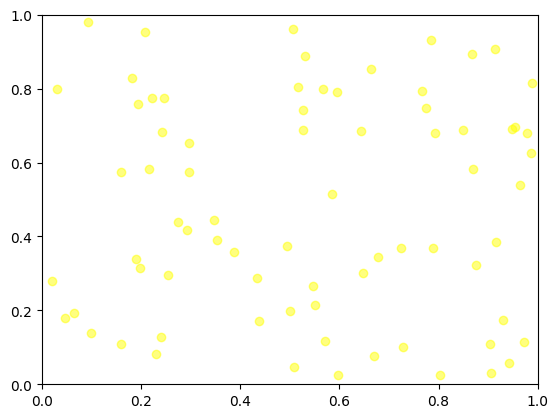

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [11]:
### Plot
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

plt.ion()  # interactive mode for Jupyter

# create the figure only once
fig, ax = plt.subplots()
sc = ax.scatter([], [], alpha=0.5, c="yellow")

# set axis limits once
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# function to update the scatter points without recreating the plot
def plot_update(positions, flashing):
    x_values = []
    y_values = []
    for i in range(len(positions)):
        if flashing[i]:
            x_values.append(positions[i][0])
            y_values.append(positions[i][1])

    coords = list(zip(x_values, y_values))
    sc.set_offsets(coords)

    display(fig)
    plt.draw()
    plt.pause(0.001)


# init Variables
N = 150
L = 50
R = [0.05, 0.1, 0.5, 1.4]
steps = 5000
for r in R:
    # init fireflies
    fireflies = [FireFly(r, L, i, N) for i in range(N)]

    # get positions of all fireflies
    positions = [f.get_position() for f in fireflies]

    # calculate neighbours of all fireflies
    for f in fireflies:
        f.calc_neighbours(positions)

    # live for n steps
    for current_step in range(steps):
        synch = [False] * N
        flashing = [False] * N

        for f in fireflies:
            uid, timer = f.live()
            synch[uid] = timer == 0
            flashing[uid] = f.flashing()

        for i in range(N):
            if synch[i]:
                fireflies[i].synch(flashing)
        if current_step%10 == 0:
            display(clear_output(True))
            print(f"After {current_step} the {N} fireflies with a neighbour radius of {r} and a cycle time of {L} are now like this:")
            plot_update(positions, flashing)
            time.sleep(2)


# Firefly implementation for b)

## Single Core

In [1]:
import random
import math
import matplotlib.pyplot as plt

class FireFly:
    def __init__(self, radius, time_steps, uid, N):
        self.uid = uid
        self.position = (random.uniform(0,1), random.uniform(0,1))
        self.neighbours = []
        self.r = radius
        self.L = time_steps
        self.cycle_timer = random.randrange(0, time_steps)
        self.population_size = N

    def calc_neighbours(self, positions):
        self.neighbours = []
        for i in range(self.population_size):
            if i == self.uid:
                continue
            if math.dist(positions[i], self.position) < self.r:
                self.neighbours.append(i)

    def get_position(self):
        return self.position

    def live(self):
        self.cycle_timer += 1
        if self.cycle_timer > self.L:
            self.cycle_timer = 0
        return self.uid, self.cycle_timer

    def synch(self, flashers):
        counter = 0
        for neighbour in self.neighbours:
            if flashers[neighbour]:
                counter += 1
        if counter > len(self.neighbours) / 2:
            self.cycle_timer += 1

    def flashing(self):
        return self.cycle_timer < self.L / 2

    def get_neighbours(self):
        return self.neighbours


# =============================================================
# Simulation parameters
# =============================================================
N = 150
L = 50
steps = 5000
num_runs = 50

r_values = [i * 0.025 for i in range(1, int(1.4 / 0.025) + 1)]
avg_amplitudes = []

# =============================================================
# Main loop over R
# =============================================================
for r in r_values:
    amplitudes = []

    for run in range(num_runs):

        fireflies = [FireFly(r, L, i, N) for i in range(N)]
        positions = [f.get_position() for f in fireflies]

        for f in fireflies:
            f.calc_neighbours(positions)

        flash_counts = []

        for current_step in range(steps):
            synch = [False] * N
            flashing = [False] * N

            for f in fireflies:
                uid, timer = f.live()
                synch[uid] = timer == 0
                flashing[uid] = f.flashing()

            for i in range(N):
                if synch[i]:
                    fireflies[i].synch(flashing)

            if current_step >= steps - L:
                flash_counts.append(sum(flashing))

        maximum = max(flash_counts)
        minimum = min(flash_counts)
        amplitude = (maximum - minimum) / 2
        amplitudes.append(amplitude)

    avg_amplitude = sum(amplitudes) / len(amplitudes)
    avg_amplitudes.append(avg_amplitude)
    print(f"r = {r:.3f}, average amplitude = {avg_amplitude:.4f}")


# =============================================================
# Plot amplitude over r
# =============================================================
plt.figure(figsize=(10, 6))
plt.plot(r_values, avg_amplitudes, linewidth=2)
plt.xlabel("vicinity radius r")
plt.ylabel("average amplitude")
plt.title("Average flash amplitude over vicinity radius")
plt.grid(True)
plt.show()


r = 0.025, average amplitude = 12.7400
r = 0.050, average amplitude = 16.5000
r = 0.075, average amplitude = 24.8900
r = 0.100, average amplitude = 28.9300
r = 0.125, average amplitude = 34.0700
r = 0.150, average amplitude = 38.2300
r = 0.175, average amplitude = 50.5300
r = 0.200, average amplitude = 51.0700
r = 0.225, average amplitude = 54.8900
r = 0.250, average amplitude = 60.6800
r = 0.275, average amplitude = 65.7800
r = 0.300, average amplitude = 68.0800
r = 0.325, average amplitude = 69.7500
r = 0.350, average amplitude = 69.2500
r = 0.375, average amplitude = 72.7000
r = 0.400, average amplitude = 72.6700


KeyboardInterrupt: 

## Multi Core

Using 12 CPU cores
r = 0.025, average amplitude = 11.5500
r = 0.050, average amplitude = 16.2000
r = 0.075, average amplitude = 23.7900
r = 0.100, average amplitude = 31.3500
r = 0.125, average amplitude = 35.8100
r = 0.150, average amplitude = 39.5000
r = 0.175, average amplitude = 44.8500
r = 0.200, average amplitude = 50.8300
r = 0.225, average amplitude = 57.4300
r = 0.250, average amplitude = 62.5000
r = 0.275, average amplitude = 66.4400
r = 0.300, average amplitude = 68.2400
r = 0.325, average amplitude = 68.6000
r = 0.350, average amplitude = 71.5800
r = 0.375, average amplitude = 70.3500
r = 0.400, average amplitude = 70.6900
r = 0.425, average amplitude = 72.5900
r = 0.450, average amplitude = 73.6200
r = 0.475, average amplitude = 73.2100
r = 0.500, average amplitude = 74.2600
r = 0.525, average amplitude = 71.7600
r = 0.550, average amplitude = 72.8000
r = 0.575, average amplitude = 73.7400
r = 0.600, average amplitude = 72.7300
r = 0.625, average amplitude = 73.2800
r = 0.

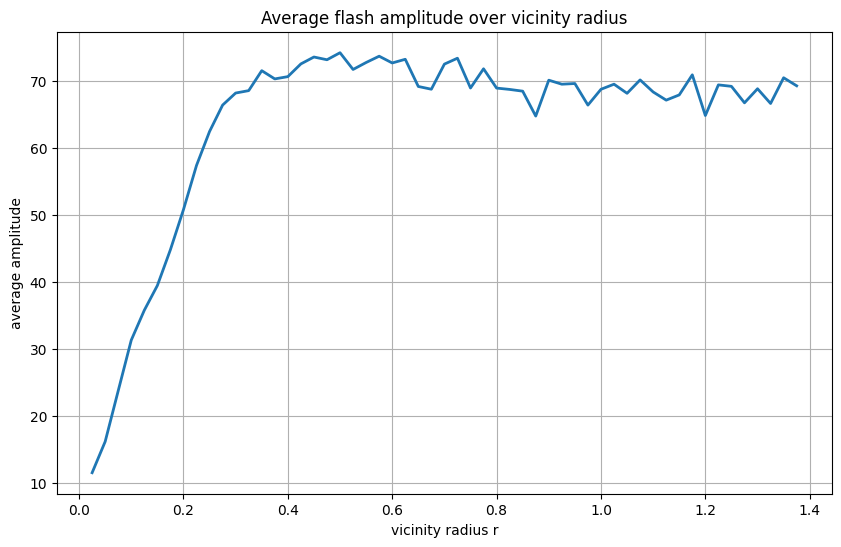

In [2]:
import random
import math
import multiprocessing as mp
import matplotlib.pyplot as plt


# =============================================================
# Firefly class
# =============================================================
class FireFly:
    def __init__(self, radius, time_steps, uid, N):
        self.uid = uid
        self.position = (random.uniform(0, 1), random.uniform(0, 1))
        self.neighbours = []
        self.r = radius
        self.L = time_steps
        self.cycle_timer = random.randrange(0, time_steps)
        self.population_size = N

    def calc_neighbours(self, positions):
        self.neighbours = []
        for i in range(self.population_size):
            if i == self.uid:
                continue
            if math.dist(positions[i], self.position) < self.r:
                self.neighbours.append(i)

    def get_position(self):
        return self.position

    def live(self):
        self.cycle_timer += 1
        if self.cycle_timer > self.L:
            self.cycle_timer = 0
        return self.uid, self.cycle_timer

    def synch(self, flashers):
        counter = 0
        for neighbour in self.neighbours:
            if flashers[neighbour]:
                counter += 1
        if counter > len(self.neighbours) / 2:
            self.cycle_timer += 1

    def flashing(self):
        return self.cycle_timer < self.L / 2


# =============================================================
# Single-run simulation (parallelizable)
# =============================================================
def run_single_sim(args):
    r, N, L, steps = args

    fireflies = [FireFly(r, L, i, N) for i in range(N)]
    positions = [f.get_position() for f in fireflies]

    for f in fireflies:
        f.calc_neighbours(positions)

    flash_counts = []

    for current_step in range(steps):
        synch = [False] * N
        flashing = [False] * N

        for f in fireflies:
            uid, timer = f.live()
            synch[uid] = (timer == 0)
            flashing[uid] = f.flashing()

        for i in range(N):
            if synch[i]:
                fireflies[i].synch(flashing)

        if current_step >= steps - L:
            flash_counts.append(sum(flashing))

    maximum = max(flash_counts)
    minimum = min(flash_counts)
    amplitude = (maximum - minimum) / 2
    return amplitude


# =============================================================
# Main script
# =============================================================
if __name__ == "__main__":
    N = 150
    L = 50
    steps = 5000
    num_runs = 50

    r_values = [i * 0.025 for i in range(1, int(1.4 / 0.025) + 1)]
    avg_amplitudes = []

    cpu_count = mp.cpu_count()
    print(f"Using {cpu_count} CPU cores")

    for r in r_values:
        args_list = [(r, N, L, steps) for _ in range(num_runs)]
        with mp.Pool(cpu_count) as pool:
            amplitudes = pool.map(run_single_sim, args_list)

        avg_amplitude = sum(amplitudes) / len(amplitudes)
        avg_amplitudes.append(avg_amplitude)

        print(f"r = {r:.3f}, average amplitude = {avg_amplitude:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(r_values, avg_amplitudes, linewidth=2)
    plt.xlabel("vicinity radius r")
    plt.ylabel("average amplitude")
    plt.title("Average flash amplitude over vicinity radius")
    plt.grid(True)
    plt.show()


## Multi core with different N and r

Using 12 CPU cores

=== Running simulations for N = 10 ===
N = 10, r = 0.050, avg amplitude = 2.8000
N = 10, r = 0.100, avg amplitude = 2.6600
N = 10, r = 0.150, avg amplitude = 2.8400
N = 10, r = 0.200, avg amplitude = 3.3800
N = 10, r = 0.250, avg amplitude = 3.5700
N = 10, r = 0.300, avg amplitude = 4.1200
N = 10, r = 0.350, avg amplitude = 4.4000
N = 10, r = 0.400, avg amplitude = 4.4100
N = 10, r = 0.450, avg amplitude = 4.4800
N = 10, r = 0.500, avg amplitude = 4.6700
N = 10, r = 0.550, avg amplitude = 4.8300
N = 10, r = 0.600, avg amplitude = 4.9400
N = 10, r = 0.650, avg amplitude = 4.8900
N = 10, r = 0.700, avg amplitude = 5.0000
N = 10, r = 0.750, avg amplitude = 4.9600
N = 10, r = 0.800, avg amplitude = 4.9400
N = 10, r = 0.850, avg amplitude = 4.8600
N = 10, r = 0.900, avg amplitude = 4.6400
N = 10, r = 0.950, avg amplitude = 4.6800
N = 10, r = 1.000, avg amplitude = 4.8000
N = 10, r = 1.050, avg amplitude = 4.8000
N = 10, r = 1.100, avg amplitude = 4.7400
N = 10, r = 1.150

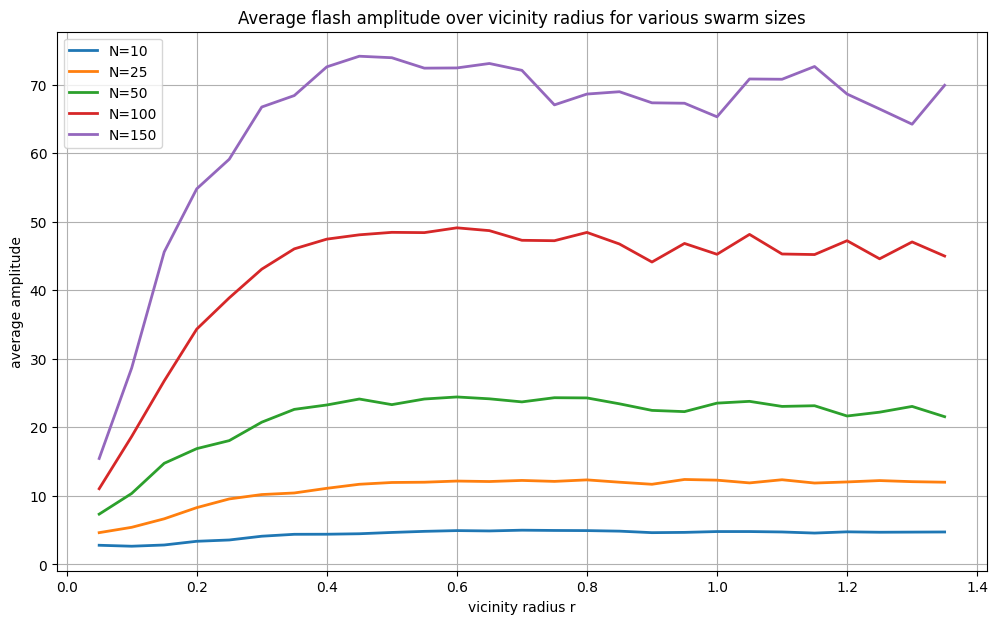

In [3]:
import random
import math
import multiprocessing as mp
import matplotlib.pyplot as plt


# =============================================================
# Firefly class
# =============================================================
class FireFly:
    def __init__(self, radius, time_steps, uid, N):
        self.uid = uid
        self.position = (random.uniform(0, 1), random.uniform(0, 1))
        self.neighbours = []
        self.r = radius
        self.L = time_steps
        self.cycle_timer = random.randrange(0, time_steps)
        self.population_size = N

    def calc_neighbours(self, positions):
        self.neighbours = []
        for i in range(self.population_size):
            if i == self.uid:
                continue
            if math.dist(positions[i], self.position) < self.r:
                self.neighbours.append(i)

    def get_position(self):
        return self.position

    def live(self):
        self.cycle_timer += 1
        if self.cycle_timer > self.L:
            self.cycle_timer = 0
        return self.uid, self.cycle_timer

    def synch(self, flashers):
        counter = 0
        for neighbour in self.neighbours:
            if flashers[neighbour]:
                counter += 1
        if counter > len(self.neighbours) / 2:
            self.cycle_timer += 1

    def flashing(self):
        return self.cycle_timer < self.L / 2


# =============================================================
# Single-run simulation (parallelizable)
# =============================================================
def run_single_sim(args):
    r, N, L, steps = args

    fireflies = [FireFly(r, L, i, N) for i in range(N)]
    positions = [f.get_position() for f in fireflies]

    for f in fireflies:
        f.calc_neighbours(positions)

    flash_counts = []

    for current_step in range(steps):
        synch = [False] * N
        flashing = [False] * N

        for f in fireflies:
            uid, timer = f.live()
            synch[uid] = (timer == 0)
            flashing[uid] = f.flashing()

        for i in range(N):
            if synch[i]:
                fireflies[i].synch(flashing)

        if current_step >= steps - L:
            flash_counts.append(sum(flashing))

    maximum = max(flash_counts)
    minimum = min(flash_counts)
    amplitude = (maximum - minimum) / 2
    return amplitude


# =============================================================
# Main script
# =============================================================
if __name__ == "__main__":
    L = 50
    steps = 5000
    num_runs = 50

    swarm_sizes = [10, 25, 50, 100, 150]
    r_values = [i * 0.05 for i in range(1, int(1.4 / 0.05) + 1)]

    cpu_count = mp.cpu_count()
    print(f"Using {cpu_count} CPU cores")

    plt.figure(figsize=(12, 7))

    # Loop over swarm sizes
    for N in swarm_sizes:
        print(f"\n=== Running simulations for N = {N} ===")

        avg_amplitudes = []

        for r in r_values:
            args_list = [(r, N, L, steps) for _ in range(num_runs)]

            with mp.Pool(cpu_count) as pool:
                amplitudes = pool.map(run_single_sim, args_list)

            avg_amplitude = sum(amplitudes) / len(amplitudes)
            avg_amplitudes.append(avg_amplitude)

            print(f"N = {N}, r = {r:.3f}, avg amplitude = {avg_amplitude:.4f}")

        plt.plot(r_values, avg_amplitudes, label=f"N={N}", linewidth=2)

    plt.xlabel("vicinity radius r")
    plt.ylabel("average amplitude")
    plt.title("Average flash amplitude over vicinity radius for various swarm sizes")
    plt.grid(True)
    plt.legend()
    plt.show()
